## Extract the subjects view

In [ ]:
import os
import scipy.io as sio
import numpy as np

In [ ]:
def handle_subj_ops(subj):
    subj_file = os.path.join(src_fold, 'subject' + format(subj)+ '.mat')
    data = sio.loadmat(subj_file)['A']
    # eliminate unwanted regions
    #data = data[:, mask]

    #subj_dest_fold = os.path.join(dst_fold, 'subject' + format(subj))
    #os.mkdir(subj_dest_fold)
    return data


In [ ]:
def extract_subj_store(subj, data):

    #subj_dest_fold = os.path.join(dst_fold, 'subject' + format(subj))
    #Proceeded by transpose  to obtain 4 matrices for each subject, already checked that it is symmetric
    data=data.transpose(2,0,1)
    #the first matrix (network) in the dataset (over 4)
    #upper_tri=np.triu(data[0])
    matrix=data[0]
    #Vectorize 
    ui=np.triu_indices(35)
    vector=matrix[ui]
    

    #f = os.path.join(subj_dest_fold, 'subjectA'+ format(subj)  + '.mat' )
    ## needed data for classification, labels and features(brain grahps' weights in our case)
    #d = {}
    #d ['vector']=vector
    #sio.savemat(f,d)
    return vector

In [ ]:
def create_dataset(subjects,src_fold,dst_fold):
    #subj_dest_fold = os.path.join(dst_fold, 'subject' + format(subj))
    d={}
    Features_vectors=[0 for i in range(630)]
    #v=np.array([[0 for i in range(630)]])
    for subj in subjects:
        subj_data=handle_subj_ops(subj)
        vector=extract_subj_store(subj,subj_data)
        Features_vectors=np.vstack((Features_vectors,vector))
        
        #v=np.append(v,np.array(vector))
        #d['subject'+format(subj)]=vector
    #d['A']=v
    Features_vectors=np.delete(Features_vectors,0,0)
    d['Features_vectors']=Features_vectors
    f = os.path.join(dst_fold, 'Feature_vectors' + '.mat' )
    sio.savemat(f,d)    
    

# --------------------Main------------------------

In [ ]:
src_fold  = '/home/raoua/Desktop/BASIRA/working repo/Data_77subjects/LH77subjects/'
label_file = '/home/raoua/Desktop/BASIRA/working repo/Data_77subjects/labels77.mat'
dst_fold = '/home/raoua/Desktop/BASIRA/working repo/intermediate/'

In [ ]:
subjects=range(1,78)
#for subj in subjects:
#    # read and create necessary folders
#    subj_data = handle_subj_ops(subj)
#    extract_subj_store(subj, subj_data)
create_dataset(subjects,src_fold,dst_fold)

### Work with GPU

In [ ]:
from keras import backend as K
if 'tensorflow' == K.backend():
    import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config2 = tf.ConfigProto()
config2.gpu_options.allow_growth = True
set_session(tf.Session(config=config2))

### Start over here 

In [1]:
import scipy.io as sio
import numpy as np

In [2]:
Data=sio.loadmat('LHmat1.mat')

In [3]:
Data

{'LHmat1': array([[0.0176007 , 0.14745   , 0.16505   , ..., 0.0154293 , 0.0154293 ,
         0.27216   ],
        [0.0152086 , 0.0855809 , 0.10079   , ..., 0.0132863 , 0.0132863 ,
         0.19974   ],
        [0.0790664 , 0.0795773 , 0.158644  , ..., 0.0191432 , 0.0191432 ,
         0.139108  ],
        ...,
        [0.0868267 , 0.143509  , 0.0566822 , ..., 0.0345723 , 0.0345723 ,
         0.14606   ],
        [0.0636159 , 0.173055  , 0.109439  , ..., 0.0092263 , 0.0092263 ,
         0.269375  ],
        [0.0450063 , 0.124946  , 0.0799401 , ..., 0.00283139, 0.00283139,
         0.206063  ]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu May 17 18:22:41 2018',
 '__version__': '1.0'}

In [4]:
X=Data['LHmat1']

In [5]:
X.shape

(77, 595)

In [6]:
X = X.astype(float)

In [7]:
X.shape

(77, 595)

## Data cleaning 
### Drop the null features 

In [8]:
labels=sio.loadmat('./labels77.mat')

In [9]:
y=labels['labels']

In [10]:
X.dtype

dtype('float64')

### Feature selection

In [11]:
y=y[:, 0]

In [12]:
n_samples, n_features = X.shape    # number of samples and number of features

In [13]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import accuracy_score
from skfeature.function.similarity_based import reliefF

### 5-fold

In [14]:
# split data into 5 folds
kf5=KFold(n_splits=5,shuffle=True)
kf10=KFold(n_splits=5,shuffle=True)
#ss = cross_validate(n_samples, n_folds=5, shuffle=True)

In [15]:
kf5.get_n_splits(X)

5

In [16]:
# Number of selected features (top k ranked features)

#top K selected features varying from 10 to 100 (with a step size of 10 features)
num_fea = [i for i in range(10,110,10)]
clf = svm.LinearSVC()    # linear SVM
correct=0
accuracy=[]

### Feature selection methods

In [17]:
#MutInfFS

from skfeature.function.information_theoretical_based import MIFS
#laplacian
from skfeature.function.similarity_based import lap_score
from skfeature.utility import construct_W
# norm
from skfeature.function.sparse_learning_based import ll_l21
from skfeature.utility.sparse_learning import *
#UDFS
from skfeature.function.sparse_learning_based import UDFS
from skfeature.utility.sparse_learning import feature_ranking
from skfeature.function.similarity_based import fisher_score

from skfeature.function.statistical_based import chi_square

from skfeature.function.statistical_based import gini_index
from skfeature.function.information_theoretical_based import FCBF
from skfeature.function.similarity_based import trace_ratio
from skfeature.function.similarity_based import SPEC
from skfeature.function.information_theoretical_based import CIFE
from skfeature.function.streaming import alpha_investing
from skfeature.function.information_theoretical_based import CMIM
from skfeature.function.sparse_learning_based import ls_l21

from skfeature.function.sparse_learning_based import MCFS
from skfeature.utility import construct_W


In [18]:
def relief_FS(X_train,y_train, k):
    
    n_samples, n_features = X.shape
    score=reliefF.reliefF(X_train,y_train,k)
    idx=reliefF.feature_ranking(score)
    return(idx,score)

In [19]:
def MIFS_FS(k,X_train,y_train):
    idx = MIFS.mifs(X_train, y_train, n_selected_features=k)
    #print(idx)
    return(idx)

In [20]:
#laplacian
from skfeature.function.similarity_based import lap_score
from skfeature.utility import construct_W
def lap_score_FS(X):
    # construct affinity matrix
    kwargs_W = {"metric": "euclidean", "neighbor_mode": "knn", "weight_mode": "heat_kernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X, **kwargs_W)
    # obtain the scores of features
    score = lap_score.lap_score(X, W=W)
    idx=lap_score.feature_ranking(score)
    return(idx,score)

In [21]:
def ll_l21_FS(X_train,y,train_index):
    Y = construct_label_matrix_pan(y)
    Y_train=Y[train_index]
    Weight, obj, value_gamma = ll_l21.proximal_gradient_descent(X_train, Y[train_index], 0.1, verbose=False)
    #print("weight ",Weight)
    idx = feature_ranking(Weight)
    
    return(idx,Weight)
    
    

In [22]:
def UDFS_FS():
    Weight = UDFS.udfs(X)
    idx=feature_ranking(Weight)
    return(idx,Weight)
    

In [23]:
def fisher_score_FS(X_train,y_train):
    score = fisher_score.fisher_score(X_train, y_train)
    idx = fisher_score.feature_ranking(score)
    return(idx,score)

In [24]:
def chi_square_FS(X,y):
    score = chi_square.chi_square(X, y)
    idx = chi_square.feature_ranking(score)
    return(idx,score)

In [25]:
def gini_index_FS(X_train,y_train):
    score = gini_index.gini_index(X_train, y_train)
    # rank features in descending order according to score
    idx = gini_index.feature_ranking(score)
    return(idx,score)

In [26]:
def FCBF_FS(X_train,y_train,k):
    #idx = FCBF.fcbf(X_train, y_train, n_selected_features=k)
    #return(idx)
    return(fcbf(X_train, y_train, n_selected_features=k))

In [27]:
def trace_ratio_FS(X,train_index,y_train):
    _,k=X.shape
    feature_idx, feature_score, subset_score=trace_ratio.trace_ratio(X[train_index], y_train, k, style='fisher')
    return(feature_idx,feature_score)

In [28]:
X.shape

(77, 595)

In [29]:
def spec_FS(X_train):
    
    kwargs = {'style': 0}

    # obtain the scores of features
    score = SPEC.spec(X_train, **kwargs)

    # sort the feature scores in an descending order according to the feature scores
    idx = SPEC.feature_ranking(score, **kwargs)
    return(idx,score)
    

In [30]:
def CIFE_FS(X_train,y_train):
    F, J_CMI, MIfy=CIFE.cife(X_train, y_train, n_selected_features=num_fea)
    return(F)

In [31]:
def alpha_investing_FS(X_train,y_train):
    idx = alpha_investing.alpha_investing(X_train, y_train, 0.05, 0.05)
    return(idx)


In [32]:
def CMIM_FS(X_train,y_train,num_fea):
    idx,_,_ = CMIM.cmim(X_train, y_train, n_selected_features=num_fea)
    #F, J_CMIM,MIfy= CMIM.cmim(X_train, y_train, n_selected_features=k)
    return(idx)
        

In [33]:
def ls_l21_FS(X_train,y,train_index):
    Y = construct_label_matrix_pan(y)
    Y_train=Y[train_index]
    W, obj, value_gamma=ls_l21.proximal_gradient_descent(X_train, Y_train, 0.1, verbose=False)
    idx = feature_ranking(W)

    return(idx,W)

In [34]:
def MCFS_FS(X_train,k):
    # construct affinity matrix
    kwargs = {"metric": "euclidean", "neighborMode": "knn", "weightMode": "heatKernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X_train, **kwargs)
    num_fea_ = k    # specify the number of selected features
    num_cluster = 20    # specify the number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the feature weight matrix
    Weight = MCFS.mcfs(X_train, n_selected_features=num_fea_, W=W, n_clusters=20)

    # sort the feature scores in an ascending order according to the feature scores
    idx = MCFS.feature_ranking(Weight)
    return(idx,Weight)
    

_____________________________________________________________________________________________________________________________

In [35]:
from boruta_py.boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
def boruta_FS(X_train,y_train):
    rf = RandomForestClassifier(n_jobs=-1, class_weight=None, max_depth=7, random_state=0)
   # Define Boruta feature selection method 
    feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=0)
    feat_selector.fit(X_train, y_train)
    idx=feat_selector.ranking_
    
    return(idx)

------------------------------------------------------------------------------------------------------------------------------------

## Add more FS to the pool and implement new ones 

In [36]:
pool_FS=[reliefF,lap_score,ll_l21,ls_l21,UDFS,fisher_score,chi_square,gini_index,SPEC,BorutaPy]#,MCFS]#trace_ratio,

### Vizualize classification results

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
  #   X_train, X_test = X[train_index], X[test_index]
k=10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
     #   y_train, y_test = y[train_index], y[test_index]
#if FS_method==reliefF:
idx,score=relief_FS(X_train,y_train,k)

selected_features_train = X_train[:, idx]
selected_features_test = X_test[:, idx]
    # train a classification model with the selected features on the training dataset
clf.fit(selected_features_train, y_train)  # predict the class labels of test data
y_predict = clf.predict(selected_features_test)
    # obtain the classification accuracy on the test data
acc = accuracy_score(y_test, y_predict)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[6 4]
 [8 8]]
              precision    recall  f1-score   support

           0       0.43      0.60      0.50        10
           1       0.67      0.50      0.57        16

    accuracy                           0.54        26
   macro avg       0.55      0.55      0.54        26
weighted avg       0.58      0.54      0.54        26



In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(selected_features_train)
pca_2d = pca.transform(selected_features_train)

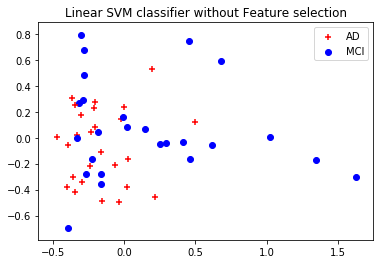

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(selected_features_train)
pca_2d = pca.transform(selected_features_train)
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='o')

pl.legend([c1, c2], ['AD', 'MCI'])
pl.title('Linear SVM classifier without Feature selection')
pl.show()

In [48]:
kf5.split(X)

<generator object _BaseKFold.split at 0x7f158856e360>

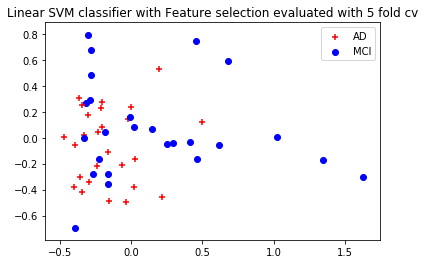

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(selected_features_train)
pca_2d = pca.transform(selected_features_train)
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='o')

pl.legend([c1, c2], ['AD', 'MCI'])
pl.title('Linear SVM classifier with Feature selection evaluated with 5 fold cv')
pl.show()

In [50]:
kf3=KFold(n_splits=3,shuffle=True)
kf5=KFold(n_splits=5,shuffle=True)
kf10=KFold(n_splits=10,shuffle=True)

____________________________________________________________________________________

### Training

In [54]:
import pandas as pd
def normalize_ranks(X,feature_ranking,cv):
    p=cv.get_n_splits(X)
    mat_temp=np.zeros((595,2))
    mat_temp[:,0]=[i for i in range(595)]
    mat_temp[:,1]=feature_ranking.sum(axis=0)/p
    labels=['new_ranks','normalized_ranks']
    df_ranks=pd.DataFrame(mat_temp,columns=labels)
    df_ranks=df_ranks.sort_values(by ='normalized_ranks')
    newranks=list(df_ranks.new_ranks.values.astype('int'))
    return(newranks)


In [55]:
def training(cv,k,FS_method):
    accuracy=[]
    featureranking=[]
    featureweight=[]
    normalized_rank_=[]
    correct=0
    selected_features_=[]
    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        if FS_method==reliefF:
            #ok=True
            idx,score=relief_FS(X_train,y_train,k)
        #elif FS_method==MIFS: ##ERROR
        #    idx,score=MIFS_FS(k,X_train,y_train)
        elif FS_method==lap_score:
            #ok=True
            idx,score=lap_score_FS(X)
        elif FS_method==ll_l21:
            #ok=True
            idx,score=ll_l21_FS(X_train,y,train_index)
        elif FS_method==UDFS:
            #ok=True
            idx,score=UDFS_FS()
        elif FS_method==fisher_score:
            #ok=True
            idx,score=fisher_score_FS(X_train,y_train)
        elif FS_method==chi_square:
            #ok=True
            idx,score=chi_square_FS(X_train,y_train)
        elif FS_method==gini_index:
            #ok=True
            idx,score=gini_index_FS(X_train,y_train)
        #elif FS_method==FCBF:
        #    idx=FCBF_FS(X_train,y_train,k)
       # elif FS_method==BorutaPy:
            #ok=False
       #     idx=boruta_FS(X_train,y_train) 
        #elif FS_method==trace_ratio:
        #    idx=trace_ratio_FS(X,train_index,y_train)
        elif FS_method==SPEC:
           # ok=True
            idx,score=spec_FS(X_train)
        #elif FS_method==CIFE:#Takes too long 
        #    idx=CIFE_FS(X_train,y_train)
        #elif FS_method==alpha_investing:#Error
        #    idx=alpha_investing_FS(X_train,y_train)
        #elif FS_method==CMIM:# Same ranking of the original features 
         #   n,m=X_train.shape
         #   idx=CMIM_FS(X_train,y_train,m)
        elif FS_method==ls_l21:
            #ok=True
            idx,score=ls_l21_FS(X_train,y,train_index)
        #elif FS_method==MCFS:
         #   idx=MCFS_FS(X_train,k)
        selected_features = X[:, idx[0:k]]
        #selected_features_.extend(selected_features)
        #normalized_rank=sum(score[0:k])/77
        #normalized_rank_.append(normalized_rank)
        featureranking.extend([idx])
        featureweight.extend([score[0:k]])
        # train a classification model with the selected features on the training dataset
        clf.fit(selected_features[train_index], y[train_index])  # predict the class labels of test data
        y_predict = clf.predict(selected_features[test_index])
        # obtain the classification accuracy on the test data
        acc = accuracy_score(y[test_index], y_predict)
        #accuracy[]
        correct = correct + acc

        # output the average classification accuracy over all folds
    #featureranking=idx[0:k]
    #featureweight=score[0:k]
    newranks=normalize_ranks(X,np.array(featureranking),cv)
    accuracy=float(correct)/cv.get_n_splits(X)
    #return(np.array(newranks[0:k]),accuracy)
   # if ok==True:
    return(np.array(newranks)[0:k],accuracy,np.array(featureweight))
    #else:
     #   return(np.array(newranks)[0:k],accuracy)
    #return(np.array(newranks[0:k]),accuracy)#,np.array(featureweight))
    #return(featureranking,accuracy,featureweight)
    #return(accuracy,np.array(normalized_rank_),featureranking,featureweight)

In [56]:
pool_FS=[reliefF,lap_score,ll_l21,ls_l21,UDFS,fisher_score,chi_square,gini_index,SPEC]#,BorutaPy]#,MCFS]#trace_ratio,

In [57]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

### Store rankings of FS methods for each k for different CV methods

In [58]:
import pandas as pd
#labels=['reliefF','lap_score','ll_l21']
labels=['reliefF','lap_score','ll_l21','ls_l21','UDFS','fisher_score','chi_square','gini_index','SPEC']#,'Borotapy']
#weight_labels=['reliefF','lap_score','ll_l21','ls_l21','UDFS','fisher_score','chi_square','gini_index','SPEC']
dataframe_ranking=pd.DataFrame(index=num_fea,columns=labels)
dataframe_weights=pd.DataFrame(index=num_fea,columns=labels)
dataframe_accuracies=pd.DataFrame(index=num_fea,columns=labels)

In [59]:
#matrix_=np.zeros((50,589*3))
for i in range(len(pool_FS)):
    for k in num_fea:
        ranking__,acc__,weight__=training(kf5,k,pool_FS[i])
        #ranking__,acc__,=training(kf5,k,pool_FS[i])
        dataframe_ranking[labels[i]][k]=ranking__
        
        dataframe_weights[labels[i]][k]=weight__
        dataframe_accuracies[labels[i]][k]=acc__
        
    
    

In [60]:
dataframe_ranking_5fold=dataframe_ranking.copy()
dataframe_weights_5fold=dataframe_weights.copy()
dataframe_accuracies_5fold=dataframe_accuracies.copy()

In [61]:
kf10=KFold(n_splits=10,shuffle=True)
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()

In [62]:
for i in range(len(pool_FS)):
    for k in num_fea:
        ranking__,acc__,weight__=training(kf10,k,pool_FS[i])
        dataframe_ranking[labels[i]][k]=ranking__
        dataframe_weights[labels[i]][k]=weight__
        dataframe_accuracies[labels[i]][k]=acc__
        

In [63]:
dataframe_ranking_10fold=dataframe_ranking.copy()
dataframe_weights_10fold=dataframe_weights.copy()
dataframe_accuracies_10fold=dataframe_accuracies.copy()

In [ ]:
for i in range(len(pool_FS)):
    for k in num_fea:
        ranking__,acc__,weight__=training(loo,k,pool_FS[i])
        dataframe_ranking[labels[i]][k]=ranking__
        dataframe_weights[labels[i]][k]=weight__
        dataframe_accuracies[labels[i]][k]=acc__
        

In [ ]:
dataframe_ranking_loo=dataframe_ranking.copy()
dataframe_weights_loo=dataframe_weights.copy()
dataframe_accuracies_loo=dataframe_accuracies.copy()

In [ ]:
dataframe_ranking_loo.head(5)

### Overlapping matrices

In [ ]:
def intersection(a,b):
    ''' A function that return the percentage of common elements to both a and b'''
    sum_=0
    for x in range(a.shape[0]):
       # for y in range(a.shape[1]):
        sum_+=np.sum((a[x]==b[x]))
    percentage=(sum_*100)/a.size
    return(percentage)

In [ ]:
def FS_to_FS_similarity(FS_k):
    n=len(FS_k)
    m=np.ones((n,n))
    for i in range(n):
        for j in range(i+1,n):
            m[i,j]=intersection(FS_k[i],FS_k[j])
            m[j,i]=m[i,j]
    #for i in range(n):
    #    m[i,i]=intersection(FS_k[i],FS_k[i])/100
    return(m)

In [ ]:
dataframe_ranking_5fold['overlapping']=dataframe_ranking_5fold.apply(
    lambda row:FS_to_FS_similarity(row),axis=1)

In [ ]:
dataframe_ranking_10fold['overlapping']=dataframe_ranking_10fold.apply(
    lambda row:FS_to_FS_similarity(row),axis=1)

In [ ]:
dataframe_ranking_loo['overlapping']=dataframe_ranking_loo.apply(
    lambda row:FS_to_FS_similarity(row),axis=1)

In [ ]:
check_symmetric(dataframe_ranking_5fold.overlapping[10])

In [77]:
X.shape

(77, 595)

#### 5-fold

In [75]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'num_fea=100')

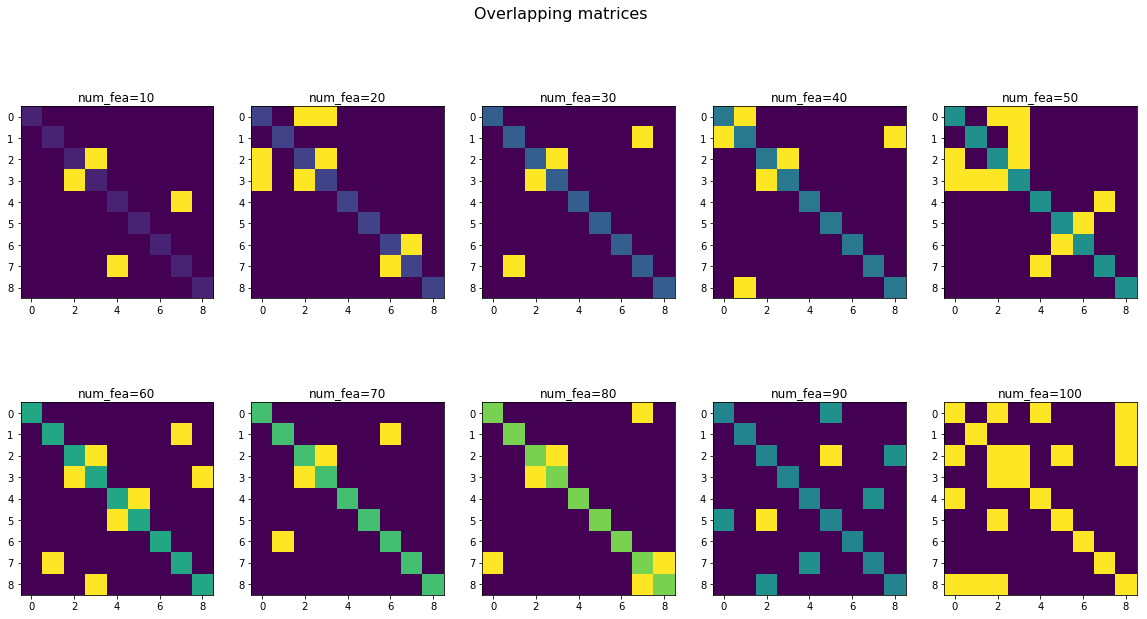

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.suptitle('Overlapping matrices', fontsize=16)

plt.subplot(2, 5, 1)
plt.imshow(dataframe_ranking_5fold.overlapping[10])
plt.title('num_fea=10')
plt.subplot(2, 5, 2)
plt.imshow(dataframe_ranking_5fold.overlapping[20])
plt.title('num_fea=20')
plt.subplot(2, 5, 3)
plt.imshow(dataframe_ranking_5fold.overlapping[30])
plt.title('num_fea=30')
plt.subplot(2, 5, 4)
plt.imshow(dataframe_ranking_5fold.overlapping[40])
plt.title('num_fea=40')
plt.subplot(2, 5, 5)
plt.imshow(dataframe_ranking_5fold.overlapping[50])
plt.title('num_fea=50')
plt.subplot(2, 5, 6)
plt.imshow(dataframe_ranking_5fold.overlapping[60])
plt.title('num_fea=60')
plt.subplot(2, 5, 7)
plt.imshow(dataframe_ranking_5fold.overlapping[70])
plt.title('num_fea=70')
plt.subplot(2, 5, 8)
plt.imshow(dataframe_ranking_5fold.overlapping[80])
plt.title('num_fea=80')
plt.subplot(2, 5, 9)
plt.imshow(dataframe_ranking_5fold.overlapping[90])
plt.title('num_fea=90')
plt.subplot(2, 5, 10)
plt.imshow(dataframe_ranking_5fold.overlapping[100])
plt.title('num_fea=100')

#### 10-fold

Text(0.5, 1.0, 'num_fea=100')

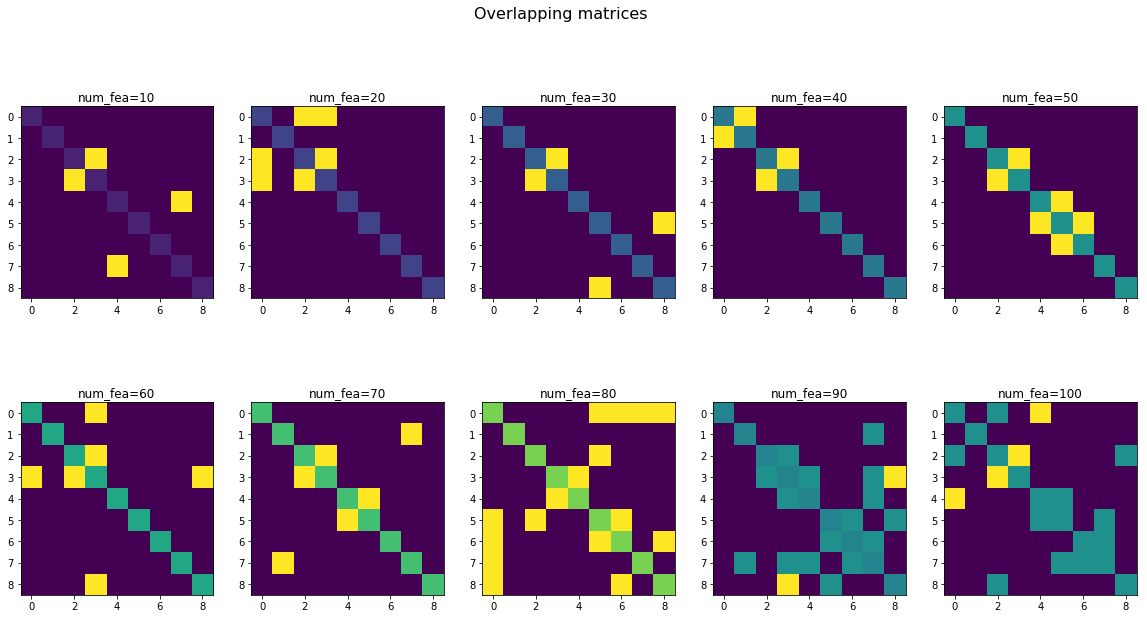

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.suptitle('Overlapping matrices', fontsize=16)

plt.subplot(2, 5, 1)
plt.imshow(dataframe_ranking_10fold.overlapping[10])
plt.title('num_fea=10')
plt.subplot(2, 5, 2)
plt.imshow(dataframe_ranking_10fold.overlapping[20])
plt.title('num_fea=20')
plt.subplot(2, 5, 3)
plt.imshow(dataframe_ranking_10fold.overlapping[30])
plt.title('num_fea=30')
plt.subplot(2, 5, 4)
plt.imshow(dataframe_ranking_10fold.overlapping[40])
plt.title('num_fea=40')
plt.subplot(2, 5, 5)
plt.imshow(dataframe_ranking_10fold.overlapping[50])
plt.title('num_fea=50')
plt.subplot(2, 5, 6)
plt.imshow(dataframe_ranking_10fold.overlapping[60])
plt.title('num_fea=60')
plt.subplot(2, 5, 7)
plt.imshow(dataframe_ranking_10fold.overlapping[70])
plt.title('num_fea=70')
plt.subplot(2, 5, 8)
plt.imshow(dataframe_ranking_10fold.overlapping[80])
plt.title('num_fea=80')
plt.subplot(2, 5, 9)
plt.imshow(dataframe_ranking_10fold.overlapping[90])
plt.title('num_fea=90')
plt.subplot(2, 5, 10)
plt.imshow(dataframe_ranking_10fold.overlapping[100])
plt.title('num_fea=100')


##### LOO

Text(0.5, 1.0, 'num_fea=100')

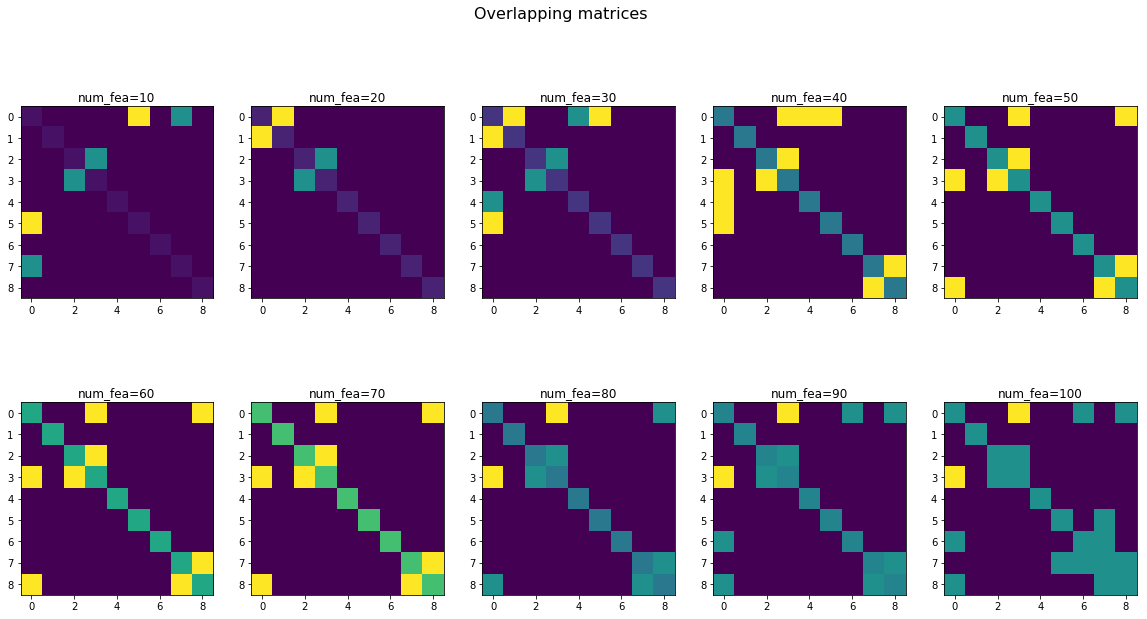

In [79]:
plt.figure(figsize=(20,10))
plt.suptitle('Overlapping matrices', fontsize=16)

plt.subplot(2, 5, 1)
plt.imshow(dataframe_ranking_loo.overlapping[10])
plt.title('num_fea=10')
plt.subplot(2, 5, 2)
plt.imshow(dataframe_ranking_loo.overlapping[20])
plt.title('num_fea=20')
plt.subplot(2, 5, 3)
plt.imshow(dataframe_ranking_loo.overlapping[30])
plt.title('num_fea=30')
plt.subplot(2, 5, 4)
plt.imshow(dataframe_ranking_loo.overlapping[40])
plt.title('num_fea=40')
plt.subplot(2, 5, 5)
plt.imshow(dataframe_ranking_loo.overlapping[50])
plt.title('num_fea=50')
plt.subplot(2, 5, 6)
plt.imshow(dataframe_ranking_loo.overlapping[60])
plt.title('num_fea=60')
plt.subplot(2, 5, 7)
plt.imshow(dataframe_ranking_loo.overlapping[70])
plt.title('num_fea=70')
plt.subplot(2, 5, 8)
plt.imshow(dataframe_ranking_loo.overlapping[80])
plt.title('num_fea=80')
plt.subplot(2, 5, 9)
plt.imshow(dataframe_ranking_loo.overlapping[90])
plt.title('num_fea=90')
plt.subplot(2, 5, 10)
plt.imshow(dataframe_ranking_loo.overlapping[100])
plt.title('num_fea=100')


### Average similarities

In [82]:
import seaborn as sns 
sns.set()

Text(0.5, 1.0, 'Distribution of average similarity 5-fold')

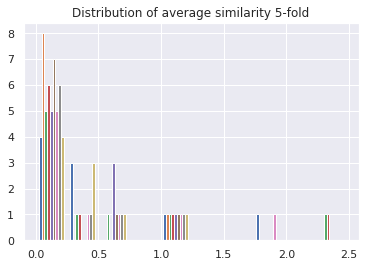

In [62]:
plt.hist(dataframe_ranking_5fold.overlapping.mean())
plt.title('Distribution of average similarity 5-fold')

### Z-score

In [ ]:
avg_sim_normalized=stats.zscore(dataframe_ranking_5fold.overlapping.mean(), axis=1, ddof=1)

In [ ]:
plt.hist(avg_sim_normalized)
plt.title('z-score normalized average similarity:5-fold')

### Manual min-max scaler

In [ ]:
avg_sim=dataframe_ranking_5fold.overlapping.mean()

In [ ]:
mn, mx = avg_sim.min(), avg_sim.max()
dist01 = (avg_sim - mn) / (mx - mn)

In [ ]:
check_symmetric(avg_sim)

In [ ]:
plt.hist(avg_sim)

In [ ]:
tested_avg_sim=dist01

In [ ]:
plt.hist(tested_avg_sim)

## Average similarity matrix

Text(0.5, 1.0, 'Average similarity case 5 fold CV')

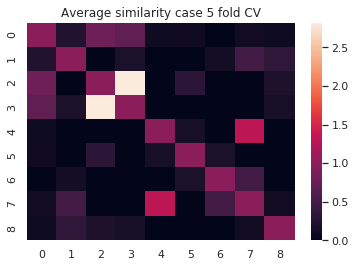

In [83]:
sns.heatmap(dataframe_ranking_5fold.overlapping.mean())
plt.title('Average similarity case 5 fold CV')

Text(0.5, 1.0, 'Average similarity case 10 fold CV')

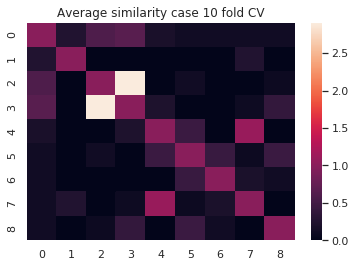

In [84]:
sns.heatmap(dataframe_ranking_10fold.overlapping.mean())
plt.title('Average similarity case 10 fold CV')

Text(0.5, 1.0, 'Average similarity case LOO CV')

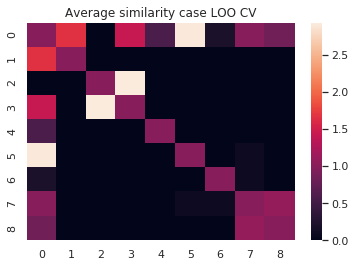

In [85]:
sns.heatmap(dataframe_ranking_loo.overlapping.mean())
plt.title('Average similarity case LOO CV')

In [68]:
dataframe_ranking_loo.overlapping

10     [[1.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 10.0, 0....
20     [[1.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
30     [[1.0, 6.666666666666667, 0.0, 0.0, 3.33333333...
40     [[1.0, 0.0, 0.0, 2.5, 2.5, 2.5, 0.0, 0.0, 0.0]...
50     [[1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0]...
60     [[1.0, 0.0, 0.0, 1.6666666666666667, 0.0, 0.0,...
70     [[1.0, 0.0, 0.0, 1.4285714285714286, 0.0, 0.0,...
80     [[1.0, 0.0, 0.0, 2.5, 0.0, 0.0, 0.0, 0.0, 1.25...
90     [[1.0, 0.0, 0.0, 2.2222222222222223, 0.0, 0.0,...
100    [[1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0]...
Name: overlapping, dtype: object

 ### Accuracy similarity matrices

In [ ]:
check_symmetric(acc_sim_matrice_5fold)

#### Z-score normalization

### Min-max normalization

### This package gives us a non symmetric matrix

### Accuracy similarity matrix

In [86]:
df_5fold_acc=dataframe_accuracies_5fold.copy()

In [87]:
df_5fold_acc.loc['mean'] =df_5fold_acc.mean()

In [88]:
from statistics import mean
import math
def cost(ai,aj):
    sigma=10
    return(math.exp(-abs(ai-aj)/sigma))
def matrix_acc(list_):
    n=len(list_)
    m=np.ones((n,n))
    for i in range(n-1):
        for j in range(i+1,n):
            m[i,j]=cost(list_[i],list_[j])
            m[j,i]=m[i,j]
    for i in range(n):
        m[i,i]=cost(list_[i],list_[i])
    
    return(m)

In [89]:
acc_sim_matrice_5fold=matrix_acc(list(df_5fold_acc.loc['mean']))

Text(0.5, 1.0, 'Accuracy similarity matrice: 5-fold cv')

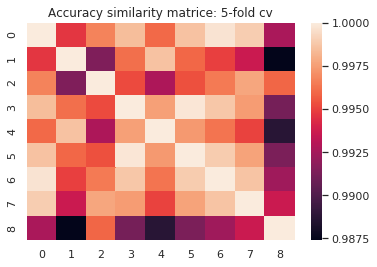

In [90]:
sns.heatmap(acc_sim_matrice_5fold)
plt.title('Accuracy similarity matrice: 5-fold cv')

In [91]:
df_10fold_acc=dataframe_accuracies_10fold.copy()

In [92]:
df_10fold_acc.loc['mean'] =df_10fold_acc.mean()

In [93]:
acc_sim_matrice_10fold=matrix_acc(list(df_10fold_acc.loc['mean']))

Text(0.5, 1.0, 'Accuracy similarity matrice: 10-fold cv')

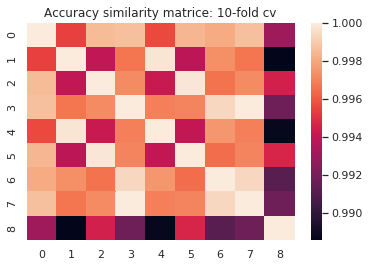

In [94]:
sns.heatmap(acc_sim_matrice_10fold)
plt.title('Accuracy similarity matrice: 10-fold cv')

In [95]:
df_loo_acc=dataframe_accuracies_loo.copy()

In [96]:
df_loo_acc.loc['mean'] =df_loo_acc.mean()

In [97]:
acc_sim_matrice_loo=matrix_acc(list(df_loo_acc.loc['mean']))

Text(0.5, 1.0, 'Accuracy similarity matrice: LOO cv')

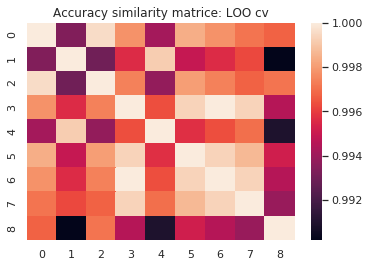

In [98]:
sns.heatmap(acc_sim_matrice_loo)
plt.title('Accuracy similarity matrice: LOO cv')

In [92]:
import seaborn as sns 
sns.set()

### Final similarity without stability

Text(0.5, 1.0, 'Final similarity matrice without stability: 5-fold cv')

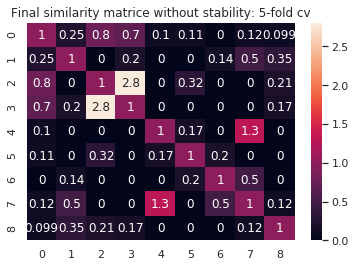

In [99]:
avg_sim_5fold=dataframe_ranking_5fold.overlapping.mean()
Final_sim_5fold=np.multiply(avg_sim_5fold,acc_sim_matrice_5fold)
sns.heatmap(Final_sim_5fold,annot=True)
plt.title('Final similarity matrice without stability: 5-fold cv')

### Z-score normalized

### Min-max normalized

Text(0.5, 1.0, 'Final similarity matrice without stability: 10-fold cv')

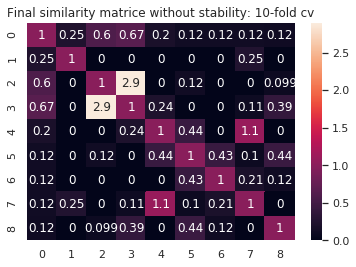

In [100]:
avg_sim_10fold=dataframe_ranking_10fold.overlapping.mean()
Final_sim_10fold=np.multiply(avg_sim_10fold,acc_sim_matrice_10fold)
sns.heatmap(Final_sim_10fold,annot=True)
plt.title('Final similarity matrice without stability: 10-fold cv')

Text(0.5, 1.0, 'Final similarity matrice without stability: LOO cv')

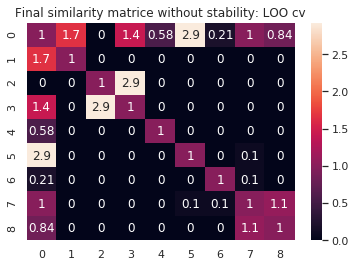

In [101]:
avg_sim_loo=dataframe_ranking_loo.overlapping.mean()
Final_sim_loo=np.multiply(avg_sim_loo,acc_sim_matrice_loo)
sns.heatmap(Final_sim_loo,annot=True)
plt.title('Final similarity matrice without stability: LOO cv')

### Binary overlapping for FS reliefF and k =10 (5-fold,10fold and LOO)

In [102]:
def binary_intersection(a,b,k):
    ''' A function that return the percentage of common elements to both a and b'''
    sum_=0
    for x in range(a.shape[0]):
        for y in range(a.shape[1]):
            sum_+=np.sum((a[x,y]==b[x,y]))
    #percentage=(sum_*100)/k
    percentage=(sum_*100)/b.size
    return(percentage)

In [103]:
def binary_matrice(FS_k,k):
    n=len(FS_k)
    m=np.ones((n,n))
    for i in range(n):
        for j in range(i+1,n):
            m[i,j]=binary_intersection(FS_k[i],FS_k[j],k)
            m[j,i]=m[i,j]
   # for i in range(n):
    #    m[i,i]=intersection(FS_k[i],FS_k[i])/100
    return(m)

In [104]:
FS_k=[dataframe_ranking_5fold.overlapping[100],dataframe_ranking_10fold.overlapping[100],
      dataframe_ranking_loo.overlapping[100]]
k=100

In [107]:
labels=['5fold','10fold','LOO']
dataframe=pd.DataFrame(binary_matrice(FS_k,k),columns=labels,index=labels)

Text(0.5, 1.0, 'The overlap in % between top 100 features discovered using a pair of CV methods')

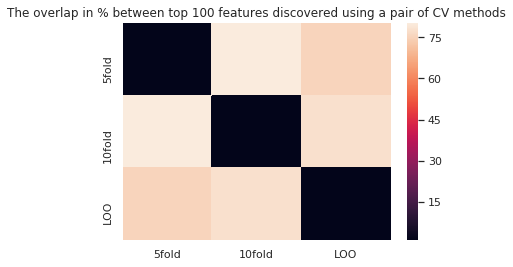

In [110]:
sns.heatmap(dataframe)
plt.title('The overlap in % between top 100 features discovered using a pair of CV methods')

### Weighted overlapping for FS reliefF and k =10 (5-fold,10fold and LOO)

In [ ]:
dataframe_weights_5fold.reliefF[10]

### Identify the most reproducible feature selection method

In [112]:
# Centrality measure 
import networkx as nx
G_5fold=nx.from_numpy_matrix(Final_sim_5fold)
#centrality_5fold=nx.degree_centrality(G_5fold)

In [113]:
G_10fold=nx.from_numpy_matrix(Final_sim_10fold)
#centrality_10fold=nx.degree_centrality(G_10fold)

In [114]:
G_loo=nx.from_numpy_matrix(Final_sim_loo)
#centrality_loo=nx.degree_centrality(G_loo)

#### Calculate betweenness and closeness centrality

In [115]:
bc_5fold=nx.betweenness_centrality(G_5fold)
cc_5fold=nx.closeness_centrality(G_5fold)

In [116]:
bc_5fold

{0: 0.19642857142857142,
 1: 0.07738095238095238,
 2: 0.03571428571428571,
 3: 0.011904761904761904,
 4: 0.011904761904761904,
 5: 0.08333333333333331,
 6: 0.029761904761904757,
 7: 0.08333333333333331,
 8: 0.04166666666666666}

In [117]:
cc_5fold

{0: 0.8888888888888888,
 1: 0.7272727272727273,
 2: 0.6666666666666666,
 3: 0.6666666666666666,
 4: 0.6153846153846154,
 5: 0.6666666666666666,
 6: 0.6153846153846154,
 7: 0.7272727272727273,
 8: 0.7272727272727273}

In [128]:
training(kf5,10,reliefF)

(array([517,   7, 197, 192, 175, 119, 570,   8,  43, 334]),
 0.6258333333333334,
 array([[ 0.09654678, -0.08953257, -0.0963537 ,  0.        ,  0.09654678,
         -0.08953257,  0.08265662, -0.09712778,  0.00891396,  0.08265662],
        [ 0.05968516, -0.08746715, -0.03284409,  0.        ,  0.05968516,
         -0.08746715, -0.03759231, -0.01619448, -0.02631946, -0.03759231],
        [ 0.02350298, -0.01170066, -0.02696234,  0.        ,  0.02350298,
         -0.01170066, -0.04648089, -0.07520003,  0.0314396 , -0.04648089],
        [ 0.01374028, -0.03194731, -0.01350316,  0.        ,  0.01374028,
         -0.03194731,  0.00238822,  0.06710749, -0.06784784,  0.00238822],
        [ 0.09975808, -0.09220024, -0.04130675,  0.        ,  0.09975808,
         -0.09220024, -0.04155108, -0.06589251,  0.06303043, -0.04155108]]))

### Determine best K and avearge accuracy 

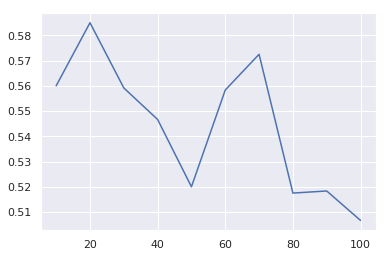

In [136]:
plt.plot(dataframe_accuracies_5fold.index,dataframe_accuracies_5fold.reliefF)

### Max average accuarcy 

In [141]:
dataframe_accuracies_5fold.reliefF.max()

0.585

In [140]:
dataframe_accuracies_5fold.index[dataframe_accuracies_5fold.reliefF == dataframe_accuracies_5fold.reliefF.max()].tolist()

[20]

### ==> Highest average accuarcy is when k=20

In [135]:
dataframe_accuracies_5fold.index

Int64Index([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype='int64')

### ==> Most reproducible FS methods is reliefF with the highest closeness centrality. So reliefF is identified as the most important node in the graph for 5-fold cross validation, consequently as the best FS method, with an average accuracy of 0.585 reached at k=20 top ranked features 

## Classification results 

In [143]:
new_rankings,acc,_=training(kf5,20,reliefF)

In [146]:
selected_features=X[:,new_rankings]

In [147]:
selected_features.shape

(77, 20)

In [148]:
k=20
for train_index, test_index in kf5.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    idx,score=relief_FS(X_train,y_train,k)
    selected_features = X[:, idx[0:k]]

    clf.fit(selected_features[train_index], y[train_index])  # predict the class labels of test data
    y_predict = clf.predict(selected_features[test_index])


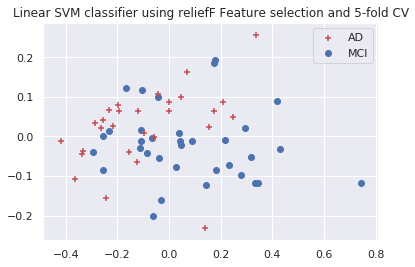

In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(selected_features[train_index])
pca_2d = pca.transform(selected_features[train_index])
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='o')

pl.legend([c1, c2], ['AD', 'MCI'])
pl.title('Linear SVM classifier using reliefF Feature selection and 5-fold CV')
pl.show()

In [118]:
bc_10fold=nx.betweenness_centrality(G_10fold)
cc_10fold=nx.closeness_centrality(G_10fold)

In [119]:
bc_10fold

{0: 0.23035714285714284,
 1: 0.0,
 2: 0.007142857142857143,
 3: 0.04464285714285714,
 4: 0.007142857142857143,
 5: 0.06845238095238095,
 6: 0.008928571428571428,
 7: 0.10238095238095236,
 8: 0.030952380952380953}

In [120]:
cc_10fold

{0: 1.0,
 1: 0.5714285714285714,
 2: 0.6666666666666666,
 3: 0.7272727272727273,
 4: 0.6666666666666666,
 5: 0.8,
 6: 0.6666666666666666,
 7: 0.8,
 8: 0.7272727272727273}

In [121]:
bc_loo=nx.betweenness_centrality(G_loo)
cc_loo=nx.closeness_centrality(G_loo)

In [122]:
bc_loo

{0: 0.8035714285714285,
 1: 0.0,
 2: 0.0,
 3: 0.25,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.05357142857142857,
 8: 0.0}

In [123]:
cc_loo

{0: 0.8888888888888888,
 1: 0.5,
 2: 0.38095238095238093,
 3: 0.5714285714285714,
 4: 0.5,
 5: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.6153846153846154,
 8: 0.5333333333333333}

In [124]:
bc_5fold

{0: 0.19642857142857142,
 1: 0.07738095238095238,
 2: 0.03571428571428571,
 3: 0.011904761904761904,
 4: 0.011904761904761904,
 5: 0.08333333333333331,
 6: 0.029761904761904757,
 7: 0.08333333333333331,
 8: 0.04166666666666666}

In [125]:
cc_5fold

{0: 0.8888888888888888,
 1: 0.7272727272727273,
 2: 0.6666666666666666,
 3: 0.6666666666666666,
 4: 0.6153846153846154,
 5: 0.6666666666666666,
 6: 0.6153846153846154,
 7: 0.7272727272727273,
 8: 0.7272727272727273}

Text(0.5, 1.0, 'Betweeness centrality')

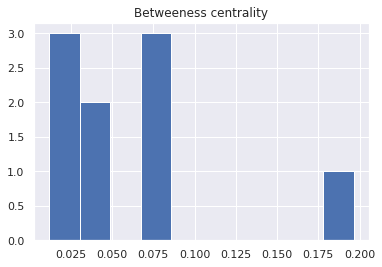

In [126]:
plt.hist(bc_5fold.values())
plt.title('Betweeness centrality')

Text(0.5, 1.0, 'closeness centrality')

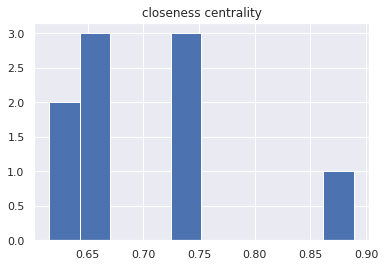

In [127]:
plt.hist(cc_5fold.values())
plt.title('closeness centrality')

#### Calculate closeness centrality

In [112]:
cc_5fold=nx.closeness_centrality(G_5fold)
bc_5fold=nx.betweenness_centrality(G_5fold)

Text(0.5, 1.0, 'Distribution of betweeness centrality')

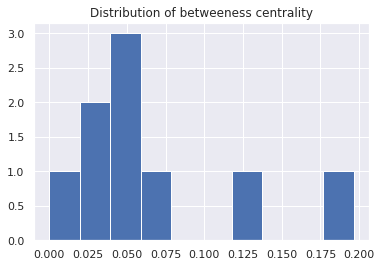

In [113]:
plt.hist(bc_5fold.values())
plt.title('Distribution of betweeness centrality')

Text(0.5, 1.0, 'Distribution of closeness centrality')

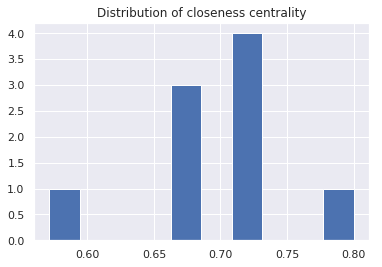

In [114]:
plt.hist(cc_5fold.values())
plt.title('Distribution of closeness centrality')

Nodes of graph: 
[0, 1, 2, 3, 4, 5, 6, 7, 8]
Edges of graph: 
[(0, 0), (0, 8), (0, 2), (0, 3), (0, 6), (1, 8), (1, 1), (1, 7), (2, 2), (2, 3), (2, 5), (2, 7), (3, 3), (3, 5), (3, 6), (3, 8), (4, 8), (4, 4), (4, 5), (4, 6), (4, 7), (5, 5), (5, 6), (5, 7), (6, 6), (6, 8), (7, 7), (7, 8), (8, 8)]


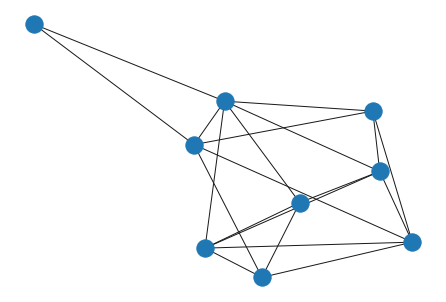

In [115]:
import networkx as nx
import matplotlib.pyplot as plt

#G=nx.path_graph(4)

print("Nodes of graph: ")
print(G_5fold.nodes())
print("Edges of graph: ")
print(G_5fold.edges())
nx.draw(G_5fold)
#plt.savefig("path_graph1.png")
plt.show()

In [ ]:
reliefF
lap_score
ll_l21
ls_l21
UDFS
fisher_score
chi_square
gini_index
SPEC


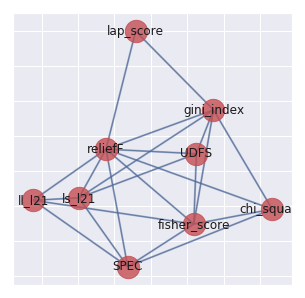

In [151]:
import matplotlib.pyplot as plt

import networkx as nx
G=G_10fold
#G=nx.from_numpy_matrix(final_sim_kf5)
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3,4,5,6,7,8],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
#nx.draw_networkx_nodes(G,pos,
#                       nodelist=[4,5,6,7],
#                       node_color='b',
#                       node_size=500,
#                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       width=2,alpha=0.5,edge_color='b')
#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
#                       width=8,alpha=0.5,edge_color='b')

#reliefF,lap_score,ll_l21,UDFS,fisher_score,chi_square,gini_index
# some math labels
labels={}
labels[0]=r'reliefF'
labels[1]=r'lap_score'
labels[2]=r'll_l21'
labels[3]=r'ls_l21'
labels[4]=r'UDFS'
labels[5]=r'fisher_score'
labels[6]=r'chi_square'
labels[7]=r'gini_index'
labels[8]=r'SPEC'
nx.draw_networkx_labels(G,pos,labels,font_size=12)

#plt.axis('off')

plt.rcParams["figure.figsize"] = (5,5)
plt.savefig("5fold_graph.png") # save as png
#plt.figure(figsize=(10,10))
plt.show() # display

import plotly.plotly as py

### Stability construction

In [70]:
def kuncheva_stability(featidx,d):
    q,k = featidx.shape
    #q = size(featidx,1);
    #q=num_methods
    r = np.zeros((q,q))
    for n in range(1,q-1):
        for m in range(n,q-1):
            r[n,m] = len(np.intersect1d(featidx[n,0],featidx[n,1])) + len(np.intersect1d(featidx[n,0],featidx[n + 1,1])) + len(np.intersect1d(featidx[n,0],featidx[n-1,1]))
    A = np.true_divide(np.subtract(r, (k**2/d)),(k-(k**2/d)))
    S = 2*sum(sum(A))/(q*(q-1))
    return(S)

In [121]:
def get_ranking_matrix(a,k):
    #The columns are the respective rankings of pool_FS
    #a=dataframe_ranking_5fold.loc[10]
    a=a.as_matrix(columns=None)
    b=np.zeros((k,len(pool_FS)))
    for i in range(len(a)):
        b[:,i]=a[i]
    return(b)

In [103]:
def normalize_stability(matrix):
    n,m=matrix.shape
    norm_mat = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            norm_mat[i,j] = 100*(matrix[i,j] - np.min(matrix)) / (np.max(matrix) - np.min(matrix))
    return(norm_mat)

In [67]:
b=get_ranking_matrix(dataframe_ranking_5fold.loc[10],10)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
np.max(b)

594.0

In [88]:
np.transpose(np.vstack((b[:,i],b[:,j])))

array([[496., 430.],
       [357., 310.],
       [  4.,  58.],
       [157., 593.],
       [262., 428.],
       [538., 312.],
       [579., 416.],
       [ 52., 191.],
       [501., 558.],
       [502., 415.]])

In [99]:
def get_stability(ranking_matrix):
    stab_mat=np.zeros((len(pool_FS),len(pool_FS)))
    for i in range(len(pool_FS)):
        for j in range(len(pool_FS)):
            if i!=j:
                stab_mat[i,j] = kuncheva_stability(np.transpose(np.vstack((ranking_matrix[:,i],ranking_matrix[:,j]))),595)
    stab_mat=np.abs(stab_mat)
    stab_mat=normalize_stability(stab_mat)
    return(stab_mat)

In [184]:
df_ranking_5fold=dataframe_ranking_5fold.copy()

In [ ]:
df_ranking_5fold.drop(['overlapping'],axis=1,inplace=True)

In [186]:
df_ranking_5fold.columns

Index(['reliefF', 'lap_score', 'll_l21', 'ls_l21', 'UDFS', 'fisher_score',
       'chi_square', 'gini_index', 'SPEC'],
      dtype='object')

In [119]:
def rowStability(row):
    matrix=get_ranking_matrix(row,row.name)
    return(get_stability(matrix))



In [122]:
df_ranking_5fold['stability']=df_ranking_5fold.apply(rowStability,axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


#### Mean stability K

In [143]:
average_5fold_stability=df_ranking_5fold.stability.mean()

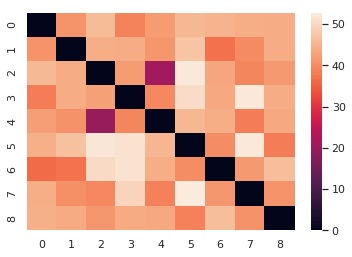

In [144]:
sns.heatmap(average_5fold_stability)

### Similarity with stability

In [147]:
Final_sim_5fold_stability=np.multiply(acc_sim_matrice_5fold,avg_sim_5fold,
                                      average_5fold_stability)

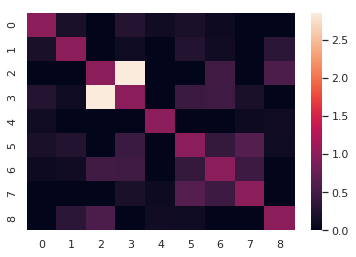

In [148]:
sns.heatmap(Final_sim_5fold_stability)

### Centrality  after stability

In [149]:
import networkx as nx
G_5fold_stability=nx.from_numpy_matrix(Final_sim_5fold_stability)
#centrality_5fold_stability=nx.degree_centrality(G_5fold_stability)

In [ ]:
centrality_5fold_stability

In [150]:
cc_5fold=nx.closeness_centrality(G_5fold_stability)
bc_5fold=nx.betweenness_centrality(G_5fold_stability)

In [151]:
bc_5fold

{0: 0.06547619047619047,
 1: 0.03571428571428571,
 2: 0.023809523809523808,
 3: 0.08035714285714285,
 4: 0.038690476190476185,
 5: 0.07440476190476189,
 6: 0.08035714285714285,
 7: 0.047619047619047616,
 8: 0.08928571428571427}

In [152]:
cc_5fold

{0: 0.7272727272727273,
 1: 0.7272727272727273,
 2: 0.6153846153846154,
 3: 0.8,
 4: 0.6153846153846154,
 5: 0.8,
 6: 0.8,
 7: 0.6666666666666666,
 8: 0.6666666666666666}

### Draw the graphs after stability 

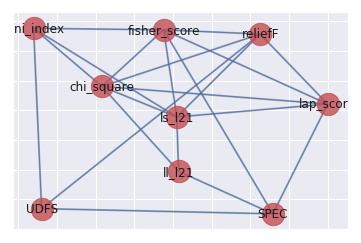

In [153]:
import matplotlib.pyplot as plt

import networkx as nx
G=G_5fold_stability
#G=nx.from_numpy_matrix(final_sim_kf5)
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3,4,5,6,7,8],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
#nx.draw_networkx_nodes(G,pos,
#                       nodelist=[4,5,6,7],
#                       node_color='b',
#                       node_size=500,
#                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       width=2,alpha=0.5,edge_color='b')
#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
#                       width=8,alpha=0.5,edge_color='b')

#reliefF,lap_score,ll_l21,UDFS,fisher_score,chi_square,gini_index
# some math labels
labels={}
labels[0]=r'reliefF'
labels[1]=r'lap_score'
labels[2]=r'll_l21'
labels[3]=r'ls_l21'
labels[4]=r'UDFS'
labels[5]=r'fisher_score'
labels[6]=r'chi_square'
labels[7]=r'gini_index'
labels[8]=r'SPEC'
nx.draw_networkx_labels(G,pos,labels,font_size=12)

#plt.axis('off')

plt.rcParams["figure.figsize"] = (5,5)
plt.savefig("5foldstability_graph.png") # save as png
#plt.figure(figsize=(10,10))
plt.show() # display

In [ ]:
bc_5fold

# ARCHIVE

### Store the results in a csv file

### Store the dataframes into .mat files

In [ ]:
# Turn it into dict

In [ ]:
d=dict()

In [ ]:
d['data']=example

In [ ]:
import os
dst_fold='/home/jupyter/Master_project/Dataframes'
file_name='ranking_5fold'

In [ ]:
f = os.path.join(dst_fold, file_name + '.mat' )
sio.savemat(f,d)

In [ ]:
rank_5fold=sio.loadmat('./Dataframes/ranking_5fold.mat')

In [ ]:
rank_5fold['data']

In [ ]:
df=pd.DataFrame(example)

In [ ]:
df=pd.DataFrame(list(example.items()))

In [ ]:
df

In [ ]:
the padataframe_ranking_10fold.reliefF[10].shape

### Binary overlapping for FS reliefF and k =10 (5-fold,10fold and 15 fold cv)

In [ ]:
a=normalise_matrix(dataframe_ranking_5fold.reliefF[10])
b=normalise_matrix(dataframe_ranking_10fold.reliefF[10])
c=normalise_matrix(dataframe_ranking_loo.reliefF[10])

In [ ]:
def overlapping_cv(a,b,c,k):
    overlapped_cv=binary_matrice([a,b,c],k)
    return(overlapped_cv)

In [ ]:
test=binary_matrice([dataframe_ranking_5fold.reliefF[10],dataframe_ranking_10fold.reliefF[10],dataframe_ranking_loo.reliefF[10]],
              10)

In [ ]:
result=overlapping_cv(a,b,c,10)

In [ ]:
test

In [ ]:
result=binary_matrice([ranking_dict_kf5['reliefF'],ranking_dict_kf10['reliefF'],ranking_dict_kf15['reliefF']],10)

In [ ]:
import pandas as pd
labels=['5fold','10fold','LOO']
dataframe=pd.DataFrame(test,columns=labels,index=labels)

In [ ]:
dataframe

In [ ]:
import seaborn as sns; sns.set()

In [ ]:
sns.heatmap(dataframe)

### Average ranking matrices of different FS methods 

In [ ]:
import seaborn as sns; sns.set()
sns.heatmap(dataframe)

### Weighted matrice

In [ ]:
matrice

In [ ]:
matrice

In [ ]:
matrice

In [ ]:
matrice0,acc_0=training(kf5,10,lap_score)

In [ ]:
matrice1,acc_1=training(kf5,10,ll_l21)


### Average similarity matrix 

In [ ]:
def intersect(a,b):
    ''' A function that returns unique elements common to both a and b in a pythonic way '''
    nrows, ncols = a.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],'formats':ncols * [a.dtype]}
    c = np.intersect1d(a.view(dtype), b.view(dtype))
    # This last bit is optional if you're okay with "C" being a structured array...
    c = c.view(a.dtype).reshape(-1, ncols)
    return(c)  

    

#### Overlapping function

### Accuracy similarity matrix

In [ ]:
from statistics import mean
import math
def cost(ai,aj):
    sigma=10
    return(math.exp(-abs(ai-aj)/sigma))

In [ ]:
def matrix_acc(list_):
    n=len(list_)
    m=np.ones((n,n))
    for i in range(n-1):
        for j in range(i+1,n):
            m[i,j]=cost(list_[i],list_[j])
            m[j,i]=m[i,j]
    for i in range(n):
        m[i,i]=cost(list_[i],list_[i])
    
    return(m)

In [ ]:
def accuracy_similarity_matrix(pool_FS,num_fea,cv):
    '''Input:
    
       pool_FS: pool of Feature selection methods
       num_fea: a list of different fs numbers in this case the threshold varies from 10 to 100 with step 10
       cv: Cross validation method (5-fold, 10_fold, LOO)
       
       Output:
       FS-to-FS Accuracy similarity matrix
       
    '''
    #avg_fs_acc_over_k={}
    avg_fs_acc_over_k=[]
    #FS_columns=['reliefF','lap_score','ll_l21','UDFS','fisher_score','chi_square','gini_index']
    for FS in pool_FS:
        acc_k=[]
        for k in num_fea:
            _feature_ranking,_acc=training(cv,k,FS)
            #avg_fs_acc_over_k[k]=
            acc_k.append(_acc)
        #avg_fs_acc_over_k[str(FS.__name__.split('.')[3])]=mean(acc_k)
        avg_fs_acc_over_k.append(mean(acc_k))
    result=matrix_acc(avg_fs_acc_over_k)
    return(result)

In [ ]:
FS_k=[]
S_k={}
similarities=[]
for k in num_fea:
    FS_k=[]

    for FS in pool_FS:
        _feature_ranking,_acc=training(kf5,k,FS)
        FS_k.append(_feature_ranking)
    S_k[k]=FS_to_FS_similarity(FS_k)

In [ ]:
similarities=[]
for k in num_fea:
    similarities.append(S_k[k])
average_similarity=sum(similarities)/len(num_fea)

In [ ]:
average_similarity

================ Run those functions ============================

In [ ]:
avg_sim_kf5,sk_kf5=average_similarity,S_k

In [ ]:
acc_sim_kf5=accuracy_similarity_matrix(pool_FS,num_fea,kf5)

In [ ]:
acc_sim_kf5

In [ ]:
# Final FS similarity matrix 
final_sim_kf5=np.multiply(avg_sim_kf5,acc_sim_kf5)

In [ ]:
final_sim_kf5.shape

In [ ]:
import seaborn as sns; sns.set()
sns.heatmap(acc_sim_kf5)

### 5-fold CV overlapping matrices

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.suptitle('Overlapping matrices', fontsize=16)

plt.subplot(2, 5, 1)
plt.imshow(sk_kf5[10])
plt.title('num_fea=10')
plt.subplot(2, 5, 2)
plt.imshow(sk_kf5[20])
plt.title('num_fea=20')
plt.subplot(2, 5, 3)
plt.imshow(sk_kf5[30])
plt.title('num_fea=30')
plt.subplot(2, 5, 4)
plt.imshow(sk_kf5[40])
plt.title('num_fea=40')
plt.subplot(2, 5, 5)
plt.imshow(sk_kf5[50])
plt.title('num_fea=50')
plt.subplot(2, 5, 6)
plt.imshow(sk_kf5[60])
plt.title('num_fea=60')
plt.subplot(2, 5, 7)
plt.imshow(sk_kf5[70])
plt.title('num_fea=70')
plt.subplot(2, 5, 8)
plt.imshow(sk_kf5[80])
plt.title('num_fea=80')
plt.subplot(2, 5, 9)
plt.imshow(sk_kf5[90])
plt.title('num_fea=90')
plt.subplot(2, 5, 10)
plt.imshow(sk_kf5[100])
plt.title('num_fea=100')



In [ ]:
plt.imshow(sk_kf5[10])

In [ ]:
import matplotlib.pyplot as plt

import networkx as nx

G=nx.from_numpy_matrix(final_sim_kf5)
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3,4,5,6],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
#nx.draw_networkx_nodes(G,pos,
#                       nodelist=[4,5,6,7],
#                       node_color='b',
#                       node_size=500,
#                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       width=2,alpha=0.5,edge_color='b')
#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
#                       width=8,alpha=0.5,edge_color='b')

#reliefF,lap_score,ll_l21,UDFS,fisher_score,chi_square,gini_index
# some math labels
labels={}
labels[0]=r'reliefF'
labels[1]=r'lap_score'
labels[2]=r'll_l21'
labels[3]=r'UDFS'
labels[4]=r'fisher_score'
labels[5]=r'chi_square'
labels[6]=r'gini_index'

nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
#plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

In [ ]:
pos

### Identifying the most reproducible feature selection method 

In [ ]:
# Centrality measure 
import networkx as nx
G=nx.from_numpy_matrix(final_sim_kf5)
centrality=nx.degree_centrality(G)

In [ ]:
centrality=nx.degree_centrality(G)

In [ ]:
centrality

### Kuncheva stability matrix 

In [ ]:
def intersection_cardinality(a,b):
    '''cardinality of the intersection of the two subsets or length of the intersection of two subsets'''
    r=0
    for x in range(a.shape[0]):
        for y in range(a.shape[1]):
            r+=np.sum((a[x,y]==b[x,y]))
    return(r)
def kuncheva_score(list_,d):
    '''
    Input:
          list_: different ranking matrices of the different FS methods
          k: top k ranked features (for k in num_fea)
          d : is the number of features in the dataset 
    Output:
           kuncheva_score_: the stability score'''
    
    #featidx = featidx(1:200,:) 
        #We only take 100 first values
    #q,k=featidx.shape
    n=len(list_)
    q=list_[0].shape[0]
    r = np.zeros((n,n))
    #kuncheva index r
    for i in range(n-1):
        for j in range(i+1,n):
            #pass
             r[i,j]=intersection_cardinality(list_[i],list_[j])
    #for n in range(2,q):
    #    for m in range(n+1,q):
            # r is the length of the intersection of two sets 
              #r(n,m) = len(intersect(featidx[n,1],featidx[n,2])) + len(intersect(featidx[n,1],featidx[n + 1,2])) + len(intersect(featidx(n,1),featidx[n-1,2]))
    # This is the consistency index for two subsets        
    A = np.true_divide((r-((k**2/d)*np.ones((q,q)))),(k-(k**2/d)))
    #A(isnan(A)) = 0;
    kuncheva_score_ = 2*np.sum(A)/(q*(q-1))
          
    return(kuncheva_score_)

def kuncheva_stability_matrix(pool_FS,num_fea):

    #S_k={}
    #similarities=[]
    for k in num_fea:
        FS_k=[]
    
        for FS in pool_FS:
            _feature_ranking,_acc=training(cv,k,FS)
            #FS_k_ranking.append(_feature_ranking)
            FS_k.append(_feature_ranking)
        S_k[k]=FS_k
            
    n=len(ranking_matrices)
    m=np.ones((n,n))
    for i in range(n-1):
        for j in range(i+1,n):
            m[i,j]=kuncheva_score(ranking_matrices[i],ranking_matrices[j])
            #m[j,i]=m[i,j]
    #for i in range(n):
    #    m[i,i]=cost(list_[i],list_[i])
    
    return(m)

In [ ]:
def kuncheva_score(list_,d):
    '''
    Input:
          list_: different ranking matrices of the different FS methods
          k: top k ranked features (for k in num_fea)
          d : is the number of features in the dataset 
    Output:
           kuncheva_score_: the stability score'''
    
    #featidx = featidx(1:200,:) 
        #We only take 100 first values
    #q,k=featidx.shape
    n=len(list_)
    q=list_[0].shape[0]
    r = np.zeros((n,n))
    #kuncheva index r
    for i in range(n-1):
        for j in range(i+1,n):
            #pass
             r[i,j]=intersection_cardinality(list_[i],list_[j])
    #for n in range(2,q):
    #    for m in range(n+1,q):
            # r is the length of the intersection of two sets 
              #r(n,m) = len(intersect(featidx[n,1],featidx[n,2])) + len(intersect(featidx[n,1],featidx[n + 1,2])) + len(intersect(featidx(n,1),featidx[n-1,2]))
    # This is the consistency index for two subsets        
    A = np.true_divide((r-((k**2/d)*np.ones((q,q)))),(k-(k**2/d)))
    #A(isnan(A)) = 0;
    kuncheva_score_ = 2*np.sum(A)/(q*(q-1))
          
    return(kuncheva_score_)

def kuncheva_stability_matrix(pool_FS,num_fea):

    #S_k={}
    #similarities=[]
    for k in num_fea:
        FS_k=[]
    
        for FS in pool_FS:
            _feature_ranking,_acc=training(cv,k,FS)
            #FS_k_ranking.append(_feature_ranking)
            FS_k.append(_feature_ranking)
        S_k[k]=FS_k
            
    n=len(ranking_matrices)
    m=np.ones((n,n))
    for i in range(n-1):
        for j in range(i+1,n):
            m[i,j]=kuncheva_score(ranking_matrices[i],ranking_matrices[j])
            #m[j,i]=m[i,j]
    #for i in range(n):
    #    m[i,i]=cost(list_[i],list_[i])
    
    return(m)

In [ ]:
r=np.ones((3,3))
k=2
d=3
A = np.true_divide((r-(k**2/d)*np.ones((3,3))),(k-(k**2/d)))

In [ ]:
np.sum(A)

In [ ]:
a=np.random.randint(low=1, high=100, size=8)
b=np.random.randint(low=1, high=100, size=8)

In [ ]:
np.zeros((3,3))

In [ ]:
def kuncheva_stability_matrix(pool_FS,num_fea):

    #S_k={}
    #similarities=[]
    for k in num_fea:
        FS_k=[]
    
        for FS in pool_FS:
            _feature_ranking,_acc=training(cv,k,FS)
            #FS_k_ranking.append(_feature_ranking)
            FS_k.append(_feature_ranking)
        S_k[k]=FS_k
            
    n=len(ranking_matrices)
    m=np.ones((n,n))
    for i in range(n-1):
        for j in range(i+1,n):
            m[i,j]=kuncheva_score(ranking_matrices[i],ranking_matrices[j])
            #m[j,i]=m[i,j]
    #for i in range(n):
    #    m[i,i]=cost(list_[i],list_[i])
    
    return(m)

### show the overlapping matrices for each k 

In [ ]:
average_sim_matrix_5fold,overlapping=avg_similarity(pool_FS,num_fea,kf5)

In [ ]:
overlapping[10]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
overlapping[10]

In [ ]:
len(overlapping)

In [ ]:
sns.heatmap(average_sim_matrix_5fold)

In [ ]:
plt.imshow(overlapping[10])

In [ ]:
kf10=KFold(n_splits=10,shuffle=True)

In [ ]:
average_sim_matrix_10fold,overlapping_10=avg_similarity(pool_FS,num_fea,kf10)

In [ ]:
sns.heatmap(overlapping[10],annot=True,cmap="coolwarm")

In [ ]:
sns.heatmap(overlapping_10[100],annot=True,cmap="coolwarm")

In [ ]:
sns.heatmap(overlapping_10[20],annot=True,cmap="BuPu")

In [ ]:

sns.heatmap(overlapping_10[20],annot=True,cmap="BuPu")

In [ ]:
sns.heatmap(overlapping_10[20],annot=True,cmap="Greens")

In [ ]:

sns.heatmap(overlapping_10[20],annot=True,cmap="RdBu_r")

In [ ]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [ ]:
plt.imshow(overlapping_10[10])

In [ ]:
average_sim_matrix_loo,overlapping_loo=avg_similarity(pool_FS,num_fea,loo)

In [ ]:
sns.heatmap(overlapping_loo[10],annot=True,cmap="coolwarm")

In [ ]:
sns.heatmap(overlapping_loo[100],annot=True,cmap="coolwarm")

In [ ]:
overlapping_loo[100]==overlapping_loo[20]

### 5-fold CV

In [ ]:
# split data into 5 folds
kf5=KFold(n_splits=5,shuffle=True)

#ss = cross_validate(n_samples, n_folds=5, shuffle=True)

In [ ]:
FS_performance_kf5=[]  
for FS in pool_FS:
    acc_k=[]
       
    for k in num_fea:
        _feature_ranking,_acc=training(kf5,k,FS)
        acc_k.append(_acc)
    FS_performance_kf5.append(acc_k)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
#def plot_performance(result,num_fea):
line1, = plt.plot(num_fea,FS_performance_kf5[0], label='reliefF')
line2, = plt.plot(num_fea,FS_performance_kf5[1], marker='', label='lap_score')
line3, = plt.plot(num_fea,FS_performance_kf5[2], marker='', label='ll_l21')
line4, = plt.plot(num_fea,FS_performance_kf5[3], marker='', label='UDFS')
line5, = plt.plot(num_fea,FS_performance_kf5[4], marker='', label='fisher_score')
line6, = plt.plot(num_fea,FS_performance_kf5[5], marker='', label='chi_square')
line7, = plt.plot(num_fea,FS_performance_kf5[6], marker='', label='gini_index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Top k ranked features')
plt.ylabel('Accuracy')

### 10-Fold CV

In [ ]:
kf10=KFold(n_splits=10,shuffle=True)

In [ ]:
FS_performance_kf10=[]  
for FS in pool_FS:
    acc_k=[]
       
    for k in num_fea:
        _feature_ranking,_acc=training(kf10,k,FS)
        acc_k.append(_acc)
    FS_performance_kf10.append(acc_k)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
#def plot_performance(result,num_fea):
line1, = plt.plot(num_fea,FS_performance_kf10[0], label='reliefF')
line2, = plt.plot(num_fea,FS_performance_kf10[1], marker='', label='lap_score')
line3, = plt.plot(num_fea,FS_performance_kf10[2], marker='', label='ll_l21')
line4, = plt.plot(num_fea,FS_performance_kf10[3], marker='', label='UDFS')
line5, = plt.plot(num_fea,FS_performance_kf10[4], marker='', label='fisher_score')
line6, = plt.plot(num_fea,FS_performance_kf10[5], marker='', label='chi_square')
line7, = plt.plot(num_fea,FS_performance_kf10[6], marker='', label='gini_index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Top k ranked features')
plt.ylabel('Accuracy')

### LOO CV

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()

In [ ]:
FS_performance_loo=[]  
fea_ranking_loo=[]
for FS in pool_FS:
    acc_k=[]
    fea_ranking_=[]
       
    for k in num_fea:
        _feature_ranking,_acc=training(loo,k,FS)
        acc_k.append(_acc)
        fea_ranking_.append(_feature_ranking)
    
    FS_performance_loo.append(acc_k)
    fea_ranking_loo.append(fea_ranking_)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
#def plot_performance(result,num_fea):
line1, = plt.plot(num_fea,FS_performance_loo[0], label='reliefF')
line2, = plt.plot(num_fea,FS_performance_loo[1], marker='', label='lap_score')
line3, = plt.plot(num_fea,FS_performance_loo[2], marker='', label='ll_l21')
line4, = plt.plot(num_fea,FS_performance_loo[3], marker='', label='UDFS')
line5, = plt.plot(num_fea,FS_performance_loo[4], marker='', label='fisher_score')
line6, = plt.plot(num_fea,FS_performance_loo[5], marker='', label='chi_square')
line7, = plt.plot(num_fea,FS_performance_loo[6], marker='', label='gini_index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Top k ranked features')
plt.ylabel('Accuracy')

In [ ]:
#FS_performance_loo
labels_pool=['reliefF','lap_score','ll_l21','UDFS','fisher_score','chi_square','gini_index']
result_acc_loo=dict()
result_acc_loo['reliefF']=FS_performance_loo[0]
result_acc_loo['lap_score']=FS_performance_loo[1]
result_acc_loo['ll_l21']=FS_performance_loo[2]
result_acc_loo['UDFS']=FS_performance_loo[3]
result_acc_loo['fidher_score']=FS_performance_loo[4]
result_acc_loo['chi_square']=FS_performance_loo[5]
result_acc_loo['gini_index']=FS_performance_loo[6]

In [ ]:
result_rank_loo=dict()
result_rank_loo['reliefF']=fea_ranking_loo[0]
result_rank_loo['lap_score']=fea_ranking_loo[1]
result_rank_loo['ll_l21']=fea_ranking_loo[2]
result_rank_loo['UDFS']=fea_ranking_loo[3]
result_rank_loo['fidher_score']=fea_ranking_loo[4]
result_rank_loo['chi_square']=fea_ranking_loo[5]
result_rank_loo['gini_index']=fea_ranking_loo[6]

In [ ]:
### Store loo ranking and accuracy

In [ ]:
dst_fold = '/home/jupyter/project/Master_project/Results'

In [ ]:
import os
f = os.path.join(dst_fold, 'accuracy_loo_LH' + '.mat' )
sio.savemat(f,result_acc_loo)

In [ ]:
f1 = os.path.join(dst_fold, 'ranking_loo_LH' + '.mat' )
sio.savemat(f1,result_acc_loo)

In [ ]:
ACC=accuracy_similarity_matrix(pool_FS,num_fea,kf5)

In [ ]:
ACC


### FS-TO-FS Stability Matrix construction

In [ ]:
result=avg_similarity(pool_FS,num_fea,kf5)

In [ ]:
result_=[]
for k in num_fea:
    result_.append(result[k])


In [ ]:
average_similarity=sum(result_)/len(num_fea)

In [ ]:
len(result_)

In [ ]:
average_similarity

In [ ]:
similarities=[]
for k in num_fea:
    similarities.append(S_k[k])

In [ ]:
S_k

In [ ]:
sum(similarities)/7

In [ ]:
SIMI=map(lambda x:Avg_Similarity_matrix(x),S_k)

In [ ]:
for element in SIMI:
    print(element)
    

In [ ]:
S10

In [ ]:
#FS_k_ranking=[]
FS_k=[]
#k=10
ranking_over_k={}
for k in num_fea:
    pool_FS=[reliefF,lap_score,ll_l21,UDFS,fisher_score,chi_square,gini_index]
    for FS in pool_FS:
        _feature_ranking=training(kf5,k,FS)
        #FS_k_ranking.append(_feature_ranking)
        FS_k.append(_feature_ranking)
    ranking_over_k[k]=FS_k
    

In [ ]:
top_k_ranked_m={}
for k in num_fea:
    similarity=FS_to_FS_similarity(ranking_over_k[k])
    top_k_ranked_m[k]=similarity

In [ ]:
top_k_ranked_m[20].shape

In [ ]:
top_k_ranked_m=[]
for fs_k in ranking_over_k:
    similarity_m=FS_to_FS_similarity(fs_k)
    top_k_ranked_m.append(similarity_m)

In [ ]:
ranking_over_k[0][0].shape

In [ ]:
#Final similarity matrix
average_similarity=

In [ ]:
sim=FS_to_FS_similarity(FS_k)

In [ ]:
len(FS_k)

In [ ]:
for i in range()

In [ ]:
sim

In [ ]:
similarity=np.array(np.nan)

In [ ]:
similarity_=dict()
columns=['reliefF','lap_score','ll_l21','UDFS']
rows=['reliefF','lap_score','ll_l21','UDFS']

In [ ]:
simila

## Sk or similarity matrix for k=10

In [ ]:
def save_performance(file_name,dst_fold,performance):
    Pool_FS_names=['reliefF','lap_score','ll_l21','UDFS','CFS']
    d={}
    for name in Pool_FS_names:
        d[name]=performance[Pool_FS_names.index(name)]
    #dst_fold='/home/raoua/Desktop/BASIRA/working repo/intermediate/'
    f = os.path.join(dst_fold, file_name + '.mat' )
    sio.savemat(f,d)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
def plot_performance(result,num_fea):
    line1, = plt.plot(num_fea,result['reliefF'][0], label='reliefF')
    line2, = plt.plot(num_fea,result['lap_score'][0], marker='', label='lap_score')
    line3, = plt.plot(num_fea,result['ll_l21'][0], marker='', label='ll_l21')
    line4, = plt.plot(num_fea,result['UDFS'][0], marker='', label='UDFS')
    line5, = plt.plot(num_fea,result['CFS'][0], marker='', label='CFS')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('Top k ranked features')
    plt.ylabel('Accuracy')
    #plt.title('Feature selection methods performance using 5-fold CV')

### -------------- Main Program ------------------

In [ ]:
## import cv method here
import os
## cv=instance()
##dst_fold='bla/bla/bla'
#performance_x=main_pipeline(cv)
## due to the fact that this pipeline is time consuming I chose to save the results of the pipeline so 
## I don't have to rerun the whole pipeline from zero
dst_fold='/home/raoua/Desktop/BASIRA/working repo/intermediate/'
save_performance('Pool_FS_Accuracy_10fold',dst_fold,performance10)
## Read the performance result for later processing
#result_file= sio.loadmat('blalalalal')


In [ ]:
import scipy.io as sio
result=sio.loadmat('./intermediate/Pool_FS_Accuracy_10fold.mat')

In [ ]:
plot_performance(result,num_fea)
plt.title('Feature selection methods performance using 10-fold CV')

### Plot the results

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

In [ ]:
import matplotlib.pyplot as plt
#from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(num_fea,result['reliefF'][0], label='reliefF')
line2, = plt.plot(num_fea,result['lap_score'][0], marker='', label='lap_score')
line3, = plt.plot(num_fea,result['ll_l21'][0], marker='', label='ll_l21')
line4, = plt.plot(num_fea,result['UDFS'][0], marker='', label='UDFS')
line5, = plt.plot(num_fea,result['CFS'][0], marker='', label='CFS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Top k ranked features')
plt.ylabel('Accuracy')
plt.title('Feature selection methods performance using 5-fold CV')

In [ ]:
from oct2py import Oct2Py
from oct2py import octave

In [ ]:
octave.addpath('/home/jupyter/Master_project/')

In [ ]:
result=octave.get_stability(X,matrice)

In [ ]:
X.shape

In [ ]:
result.shape